<a href="https://colab.research.google.com/github/EOHFA-GOAT/machine-learning-projects/blob/master/Predicting%20the%20Quality%20of%20Red%20Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction
In this Machine Learning project, I will first do some exploratory data analysis (EDA) on the dataset, and then use multiple models and algorithms to predict the quality of red wine. Finally, the best model will be increased in accuracy. 


##Uploading the Dataset

In [21]:
#Importing all necessary files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


## Doing EDA

In [22]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


I am going to get some info on the columns

In [23]:
#info on columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


So, I have 11 float types and 1 int types to keep in mind

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


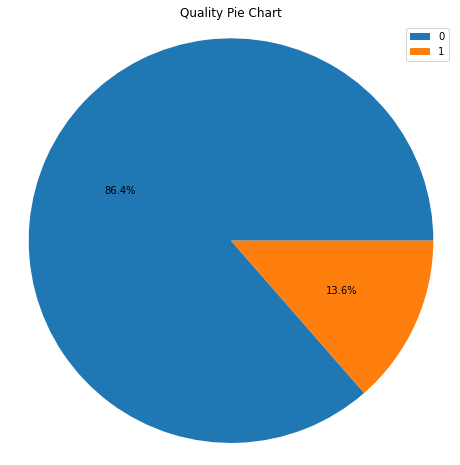

The good quality wines count for  13.6 %.


In [27]:
data['grade'] = 1 # good
data.grade[data.quality < 7] = 0 # not good

plt.figure(figsize = (8,8))
labels = data.grade.value_counts().index
plt.pie(data.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count for ',round(data.grade.value_counts(normalize=True)[1]*100,1),'%.')

I will start to plot now

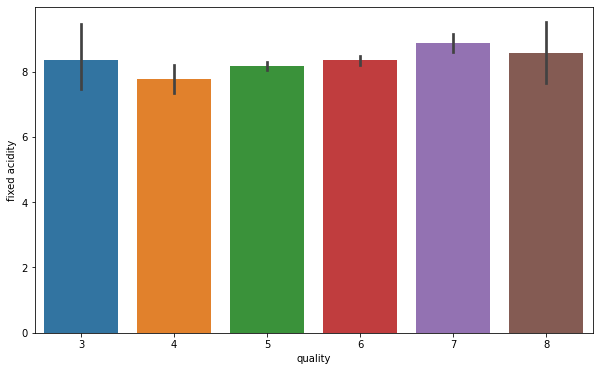

In [0]:
#plotting fixed acidity over quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

Fixed acidity does not give any indications to classify the quality (Pretty much even throughout).

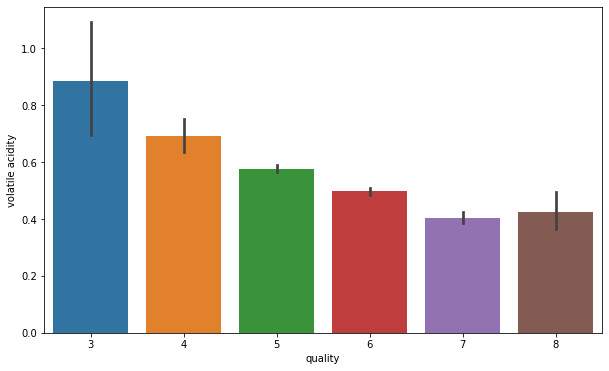

In [0]:
#plotting volatile acidity over quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

Clearly a downward trend in this plot.

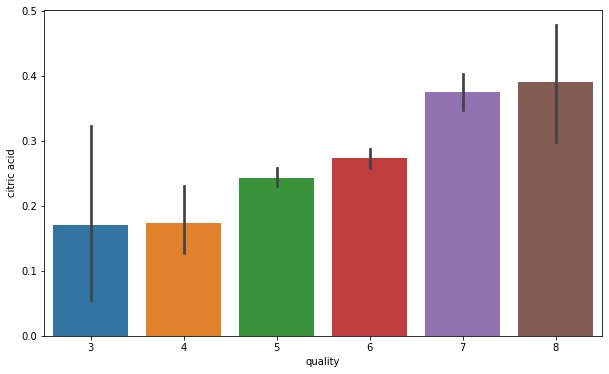

In [0]:
#plotting the composition of citric acid over quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

Clearly an upward trend in this plot.

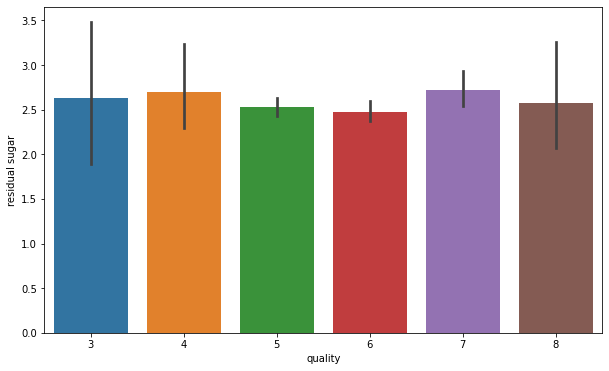

In [0]:
#plotting residual sugar over quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

No important specifications in this plot

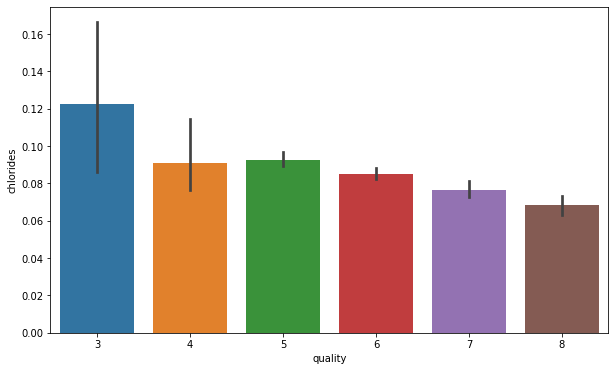

In [0]:
#plotting the composition of chlorides over quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

A bit of a downward trend in this plot.

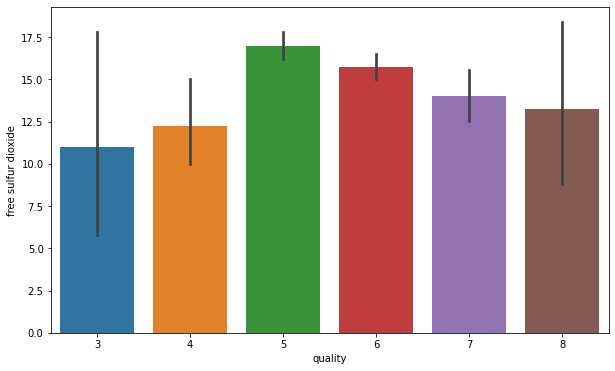

In [0]:
#plotting free sulfur dioxide (a measure of the amount of sulfur dioxide that is not present in wine) over quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

No obvious trend in this plot

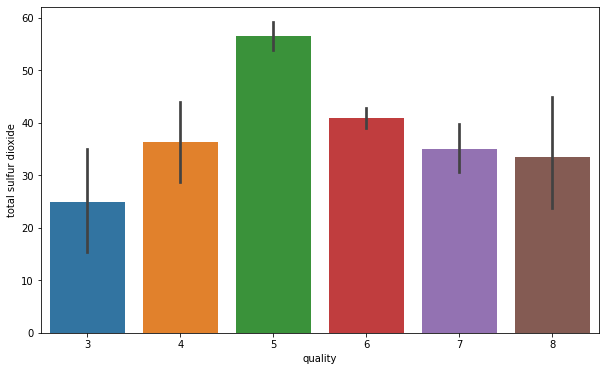

In [0]:
#plotting total sulfur dioxide over quality
fig = plt.figure(figsize=(10,6) )
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

Ehhhh.... Nothing to notice

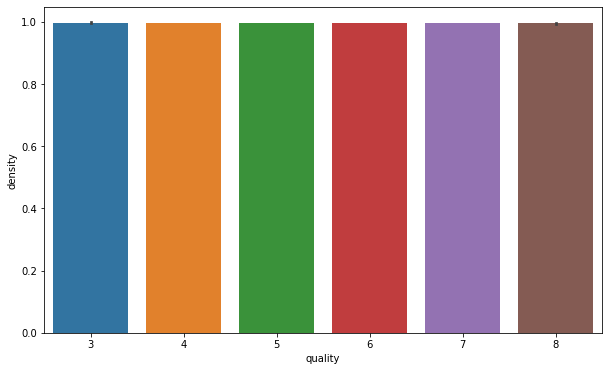

In [0]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = data)

Yeah.... nothing to worry about here!

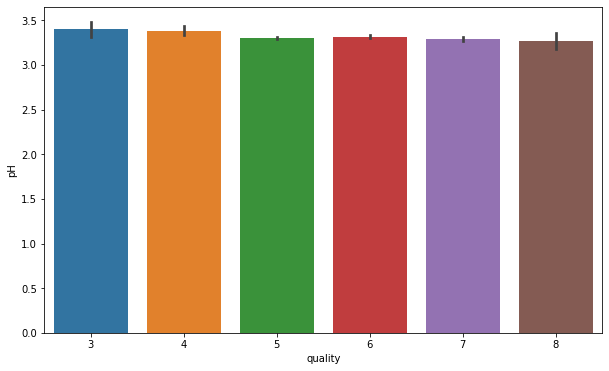

In [0]:
#plotting pH over quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = data)

As with the previous plot, nothing to worry about here!

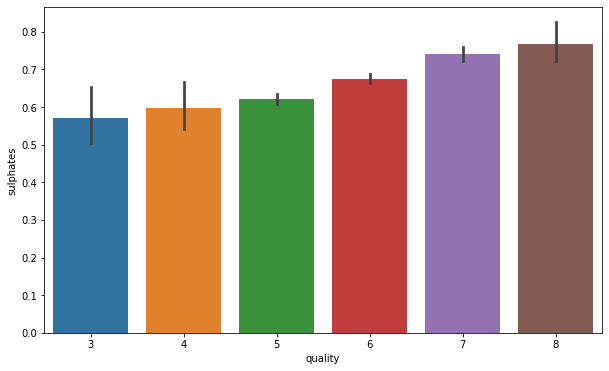

In [0]:
#plotting sulfate levels over quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

An upwards trend!

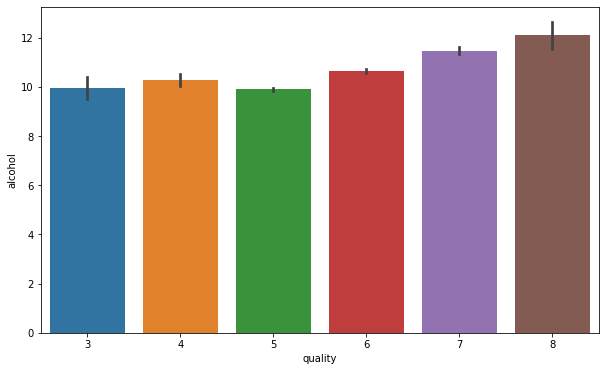

In [0]:
#plotting alcohol levels over quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

An upward trend in this plot

## Quick Data Analysis Summary
It turns out that 6 out of the 11 columns that were plotted against quality showed no trends.

 Out of the remaing 5, alcohol, sulfate levels, and composition of citric acid showed an upward trend. In more applicable terms, the greater the values of these substances, the better the quality of the wine.

However, thankfully, the composition of chlorides and volatile acidity showed a downward trend. Thus, in more applicable terms, when there is less chlorides and volatile acidity involved, the quality of the wine is better.

##Spliting the Dataset into Training and Testing Sets

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import accuracy_score

df_train_features = data.drop(['quality','grade'], axis =1)
n = 11

x_train, x_test, y_train, y_test = train_test_split(df_train_features, data['grade'], test_size=0.1, random_state=7)

x_train_mat = x_train.values.reshape((len(x_train), n))
x_test_mat = x_test.values.reshape((len(x_test), n))

##Beginning Predictions

In [29]:
print('Start Predicting...')

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_mat,y_train)
tree_pred = decision_tree.predict(x_test_mat)

rf = RandomForestClassifier()
rf.fit(x_train_mat,y_train)
rf_pred = rf.predict(x_test_mat)

KN = KNeighborsClassifier()
KN.fit(x_train_mat,y_train)
KN_pred = KN.predict(x_test_mat)

Gaussian = GaussianNB()
Gaussian.fit(x_train_mat,y_train)
Gaussian_pred = Gaussian.predict(x_test_mat)

svc = SVC()
svc.fit(x_train_mat,y_train)
svc_pred = svc.predict(x_test_mat)

xgb = xgboost.XGBClassifier()
xgb.fit(x_train_mat,y_train)
xgb_pred = xgb.predict(x_test_mat)

print('...Complete')

Start Predicting...
...Complete


##Obtaining Accuracy Scores

In [30]:
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')
print('GaussianNB:',accuracy_score(y_test, Gaussian_pred)*100,'%')
print('SVC:',accuracy_score(y_test, svc_pred)*100,'%')
print('XGB:',accuracy_score(y_test, xgb_pred)*100,'%')

Decision Tree: 89.375 %
Random Forest: 92.5 %
KNeighbors: 87.5 %
GaussianNB: 85.0 %
SVC: 88.75 %
XGB: 88.75 %


Random Forest is the best prediction model

##Tuning the Model

In [31]:
k = [10,20,30,40,50]
for i in k:
    rf_tune = RandomForestClassifier(n_estimators=50, random_state=i)
    rf_tune.fit(x_train_mat,y_train)
    y_pred = rf_tune.predict(x_test_mat)
    print(accuracy_score(y_test, y_pred)*100,'%')

93.125 %
92.5 %
91.875 %
90.625 %
90.0 %


After tuning, the machine got an accuracy score of 93.125% with the Random Forest model.

##Adding all Train Data

In [32]:
x_train_check = df_train_features.values.reshape((len(df_train_features), n))
x_test_check = data['grade'].values.reshape((len(data['grade']), 1))

k = [10,20,30,40,50]
for i in k:
    rf_tune = RandomForestClassifier(n_estimators=50, random_state=i)
    rf_tune.fit(x_train_mat,y_train)
    yy_pred = rf_tune.predict(x_train_check)
    print(accuracy_score(x_test_check, yy_pred)*100,'%')

99.24953095684803 %
99.24953095684803 %
99.1869918699187 %
98.99937460913071 %
98.99937460913071 %


Woww! Accuracy Score of a little over 99%!!!

## Conclusion
After spliting the dataset into testing and training sets, many models were applied to allow the machine to learn. It turned out that the Random Forest algorithm was the best model. Thus, this was tuned for better accuracy. Later, all of the training data were added to the model to greatly impact the accuracy score. The machine ultimately recieved a score of 99.2495% in accuracy. In other words, one can surely rely on this model to predict the quality of wine!

I hope that you enjoyed this project!

Emini Offutt, High School Junior

09 April 2020 

(Happy B-Day Dr. Thompson!)